In [1]:
%load_ext autoreload
%autoreload 2
import os
import torch as t
import torch.nn as nn
from utils.config import opt
from model import FasterRCNNVGG16
from trainer import FasterRCNNTrainer
from data.util import  read_image
from utils.vis_tool import vis_bbox
from utils import array_tool as at
from utils.average import AverageVal
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

os.environ["CUDA_VISIBLE_DEVICES"] = "4"

In [2]:
# img = read_image('misc/mmexport1535710490584.jpg')
img = read_image('misc/pic/cat-4713380.jpg')
print(img.shape)
# img = img[:, 2016:2016+1164, 5016:5016+2280]
print(img.shape)
img = t.from_numpy(img)[None]

/home/jincheng/anaconda3/lib/python3.7/site-packages/PIL/Image.py:2731: DecompressionBombWarning: Image size (109366532 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


(3, 8063, 13564)
(3, 8063, 13564)


In [3]:
logger = AverageVal()
faster_rcnn = FasterRCNNVGG16()

trainer = FasterRCNNTrainer(faster_rcnn, logger).cuda()

# trainer = FasterRCNNTrainer(faster_rcnn, logger)

Setting up a new session...
Traceback (most recent call last):
  File "/home/jincheng/anaconda3/lib/python3.7/site-packages/urllib3/connection.py", line 159, in _new_conn
    (self._dns_host, self.port), self.timeout, **extra_kw)
  File "/home/jincheng/anaconda3/lib/python3.7/site-packages/urllib3/util/connection.py", line 80, in create_connection
    raise err
  File "/home/jincheng/anaconda3/lib/python3.7/site-packages/urllib3/util/connection.py", line 70, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 111] Connection refused

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jincheng/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py", line 600, in urlopen
    chunked=chunked)
  File "/home/jincheng/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py", line 354, in _make_request
    conn.request(method, url, **httplib_request_kw)
  File "/home/jincheng/anaconda3/lib

Exception in user code:
------------------------------------------------------------


You'll need to download pretrained model from [google dirve](https://drive.google.com/open?id=1cQ27LIn-Rig4-Uayzy_gH5-cW-NRGVzY) 
# 1. model converted from chainer

In [ ]:
# in this machine the cupy isn't install correctly... 
# so it's a little slow
trainer.load('model/chainer_best_model_converted_to_pytorch_0.7053.pth')
opt.caffe_pretrain=True # this model was trained from caffe-pretrained model
_bboxes, _labels, _scores = trainer.faster_rcnn.predict(img,visualize=True)
vis_bbox(at.tonumpy(img[0]),
         at.tonumpy(_bboxes[0]),
         at.tonumpy(_labels[0]).reshape(-1),
         at.tonumpy(_scores[0]).reshape(-1))
# it failed to find the dog, but if you set threshold from 0.7 to 0.6, you'll find it

# 2. model trained with torchvision pretrained model

In [ ]:
trainer.load('model/fasterrcnn_12211511_0.701052458187_torchvision_pretrain.pth')
opt.caffe_pretrain=False # this model was trained from torchvision-pretrained model
_bboxes, _labels, _scores = trainer.faster_rcnn.predict(img,visualize=True)
plt.figure(figsize=(12, 6))
vis_bbox(at.tonumpy(img[0]),
         at.tonumpy(_bboxes[0]),
         at.tonumpy(_labels[0]).reshape(-1),
         at.tonumpy(_scores[0]).reshape(-1))
plt.show()
# it failed to find the dog, but if you set threshold from 0.7 to 0.6, you'll find it

# 3. model trained with caffe pretrained model

In [ ]:
trainer.load('model/fasterrcnn_12222105_0.712649824453_caffe_pretrain.pth')
opt.caffe_pretrain=True # this model was trained from caffe-pretrained model
_bboxes, _labels, _scores = trainer.faster_rcnn.predict(img,visualize=True)
vis_bbox(at.tonumpy(img[0]),
         at.tonumpy(_bboxes[0]),
         at.tonumpy(_labels[0]).reshape(-1),
         at.tonumpy(_scores[0]).reshape(-1))
plt.axis("off")
plt.savefig('demo_out.jpg')
plt.show()

# 4. model trained by ourselves

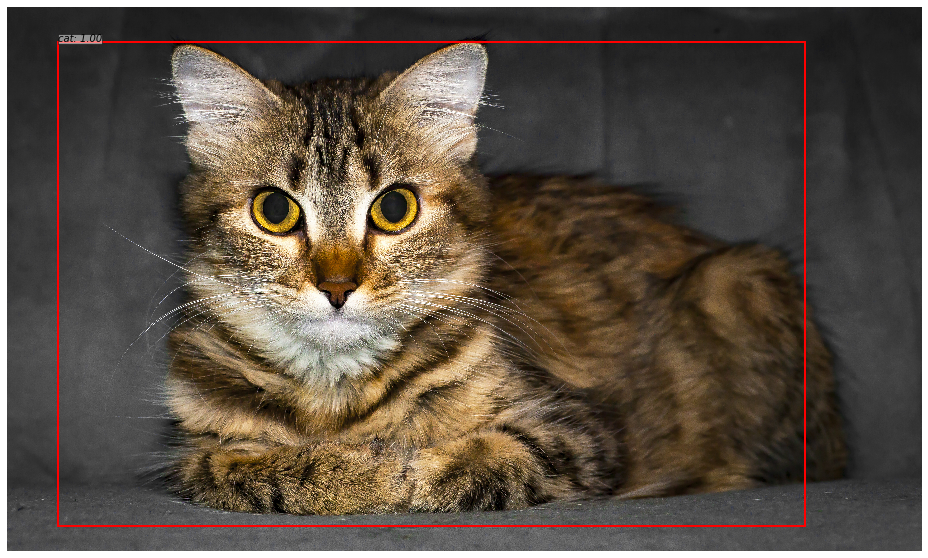

In [4]:
trainer.load('checkpoints/fasterrcnn_03090654_0.6984418117245029')
# trainer.load('checkpoints/fasterrcnn_03090654_0.6984418117245029')
# trainer.load('checkpoints/fasterrcnn_03090336_0.5173704257148148')
opt.caffe_pretrain=False # this model was trained from caffe-pretrained model
_bboxes, _labels, _scores = trainer.faster_rcnn.predict(img,visualize=True)
vis_bbox(at.tonumpy(img[0]),
         at.tonumpy(_bboxes[0]),
         at.tonumpy(_labels[0]).reshape(-1),
         at.tonumpy(_scores[0]).reshape(-1), 
         figsize=(25, 10))
plt.axis("off")
plt.savefig('demo_out.jpg')
plt.show()

In [5]:
print(img.shape)
h = trainer.faster_rcnn.getFeatureMap(img)
h[0] = np.array(h[0].cpu().numpy())
print(np.max(h[0][0][1]))
print(h[0].shape)

torch.Size([1, 3, 8063, 13564])
0.61921597
(1, 512, 37, 62)


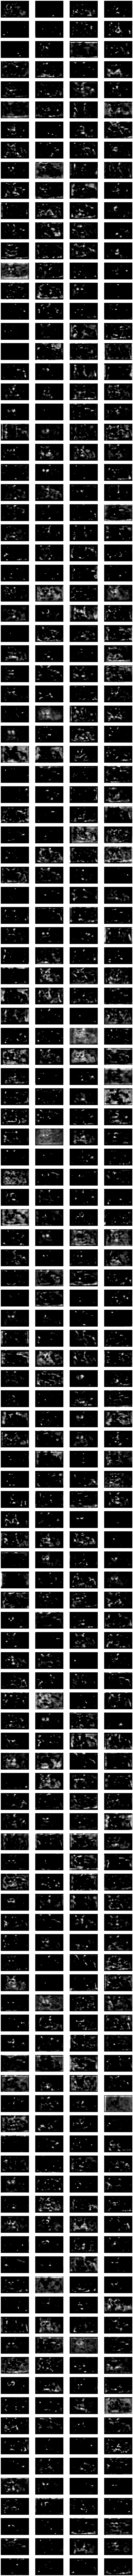

In [6]:
plt.figure(figsize=(20, 400))
for i in range(512):
    plt.subplot(128, 4, i+1)
    plt.imshow(h[0][0][i], cmap=plt.cm.gray)
    plt.axis("off")
plt.savefig('feature_map.jpg')
plt.show()